In [1]:
import base64
import chardet
import pprint
import requests
from IPython.display import Image

VIRASANA_URL = "http://localhost/virasana/"

# Realizando consulta no BD

In [2]:
r = requests.get(VIRASANA_URL + "grid_data", params={'metadata.numeroinformado': 'HASU1455443'})
print(r.url)
print(r.text)

http://localhost/virasana/grid_data?metadata.numeroinformado=HASU1455443
["5c5309281004b3779c37d3a4","5c5309281004b3779c37d3a2"]



In [3]:
lista_ids = list(r.json())

In [4]:
for _id in lista_ids:
    r = requests.get(VIRASANA_URL + "summary/%s" % _id)
    print(r.url)
    print(r.text)

http://localhost/virasana/summary/5c5309281004b3779c37d3a4
Data de escaneamento
2017-07-01 03:00
Nome Recinto
SANTOS BRASIL
Número contêiner informado pelo recinto
HASU1455443
Data de Carregamento da imagem no sistema
2019-01-31 14:41
ERRO AO BUSCAR DADOS CARGA
Não foi encontrado registro do CARGA na função integracao.carga.summary
http://localhost/virasana/summary/5c5309281004b3779c37d3a2
Data de escaneamento
2017-07-01 03:00
Nome Recinto
SANTOS BRASIL
Número contêiner informado pelo recinto
HASU1455443
Data de Carregamento da imagem no sistema
2019-01-31 14:41
CONTÊINER COM CARGA

Data e hora de atracação do Manifesto
02/07/2017 04:26:00
Conhecimento - Manifesto - Escala
CE 151707130574300 - 1517701460530 - 17000205049
NCM
2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818 2818
Operação
lce - Exportação
Número contêiner - tara - peso - volume
hasu1455443 - 

In [5]:
imgs = []
for _id in lista_ids:
    r = requests.get(VIRASANA_URL + "image/%s" % _id)
    print(r.url)
    imgs.append(r)

http://localhost/virasana/image/5c5309281004b3779c37d3a4
http://localhost/virasana/image/5c5309281004b3779c37d3a2


In [6]:
encode = chardet.detect(imgs[0].content)
print(encode)
pprint.pprint(bytes(imgs[0].content).decode(encode['encoding']))

{'encoding': 'UTF-16LE', 'confidence': 1.0}
('\ufeff<DataForm><Version>V01.07</Version><TruckId>201707010026140001</TruckId><State>5</State><Site>002614</Site><Date>2017-07-01T03:00:26.037Z</Date><InTraining>0</InTraining><InReference>0</InReference><Archived>0</Archived><InEdition>0</InEdition><Analysed>1</Analysed><CheckedOut>0</CheckedOut><Approved>0</Approved><Pending>0</Pending><AdminData><FileId/><Custom1>C</Custom1><Custom6>D</Custom6><Comments/><Vehicle><PlateNumber/><OCR>-1</OCR><Trailers><Trailer><PlateNumber/><OCR>-1</OCR><Containers><Container><ContainerId>HASU1455443</ContainerId><OCR>99</OCR></Container><Container><ContainerId/><OCR>-1</OCR></Container></Containers></Trailer></Trailers><Driver/></Vehicle></AdminData><ProcessInstructions><InspectionType '
 'Value="0"/><EnergyLevel '
 'Value="0"/><PendingRequired>0</PendingRequired><ScanPosition>0</ScanPosition><HEDRequired>0</HEDRequired><Speed>24</Speed><IsContainerEmpty>0</IsContainerEmpty></ProcessInstructions><Operatio

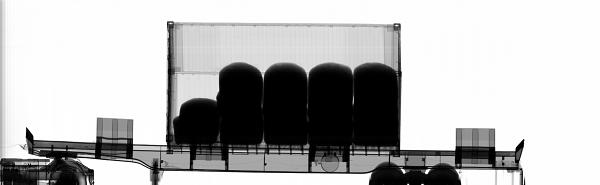

In [7]:
Image(imgs[1].content)

http://localhost/virasana/mini1/5c5309281004b3779c37d3a2


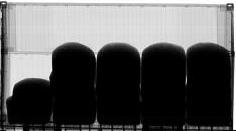

In [8]:
r = requests.get(VIRASANA_URL + "mini1/%s" % lista_ids[1])
print(r.url)
Image(r.content)

In [9]:
r = requests.get(VIRASANA_URL + "mini2/%s" % lista_ids[1])
print(r.url)
Image(r.content)

http://localhost/virasana/mini2/5c5309281004b3779c37d3a2


In [10]:
r = requests.get(VIRASANA_URL + "json/%s" % lista_ids[1])
print(r.url)
pprint.pprint(r.json())

http://localhost/virasana/json/5c5309281004b3779c37d3a2
{'UNIDADE': 'ALFSTS:',
 'carga': {'atracacao': {'_id': {'$oid': '5c5342e31004b333d727dced'},
                         'codigoterminal': 'brssz016',
                         'dataatracacao': '02/07/2017',
                         'dataatracacaoiso': {'$date': 1498969560000},
                         'datadesatracacao': '03/07/2017',
                         'escala': '17000205049',
                         'horaatracacao': '04:26:00',
                         'horadesatracacao': '12:50:00',
                         'localatracacao': 'santos brasil quay 2',
                         'nometerminal': 'santos brasil',
                         'situacao': 'atracada'},
           'conhecimento': [{'_id': {'$oid': '5c53495b1004b33a1640f42d'},
                             'codigoagentenavegacao': '02427026000146',
                             'codigoportodestino': 'aejea',
                             'codigoportoorigem': 'brssz',
         